In [11]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import integrate

%matplotlib inline


In [2]:
cd /Users/austinmcdonald/Desktop/data/Fluo4/8-11-16/Ar fluo4-3

/Users/austinmcdonald/Desktop/data/Fluo4/8-11-16/Ar fluo4-3


In [3]:
os.listdir()

['.DS_Store',
 'Ba_0-10s.csv',
 'Ba_1-10s.csv',
 'Ba_2-10s.csv',
 'Ba_3-10s.csv',
 'Ba_4-10s.csv',
 'Ba_5-10s.csv',
 'CCD-noise.csv',
 'info.txt']

In [4]:
backg = pd.read_csv('CCD-noise.csv',delimiter=",",names = ['wave','back'],skiprows=33,skipfooter=1,engine='python')
ba0 = pd.read_csv('Ba_0-10s.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
ba1 = pd.read_csv('Ba_1-10s.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
ba2 = pd.read_csv('Ba_2-10s.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
ba3 = pd.read_csv('Ba_3-10s.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')


In [5]:
ba0['dif'] = ba0['sig'].diff().abs()
ba0['BS'] = ba0['sig']-backg['back']

ba1['dif'] = ba1['sig'].diff().abs()
ba1['BS'] = ba1['sig']-backg['back']

ba2['dif'] = ba2['sig'].diff().abs()
ba2['BS'] = ba2['sig']-backg['back']

ba3['dif'] = ba3['sig'].diff().abs()
ba3['BS'] = ba3['sig']-backg['back']


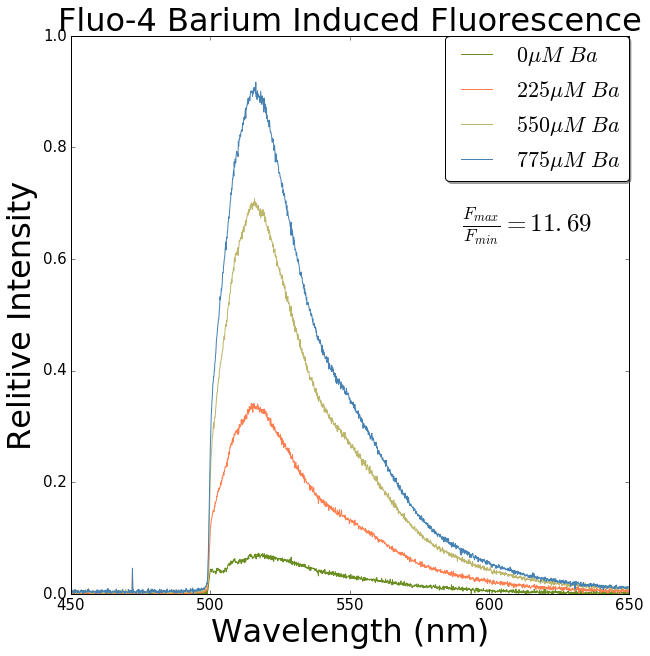

In [18]:
plt.figure(figsize=(10,10))

ba0f = ba0[ba0['dif']<.1]
ba1f = ba1[ba1['dif']<.1]
ba2f = ba2[ba2['dif']<.1]
ba3f = ba3[ba3['dif']<.1]



plt.plot(ba0f['wave'],ba0f['BS'],color='olivedrab',label=r'$0 \mu M$ $Ba$')
plt.plot(ba1f['wave'],ba1f['BS'],color='coral',label=r'$225 \mu M$ $Ba$')
plt.plot(ba2f['wave'],ba2f['BS'],color='darkkhaki',label=r'$550 \mu M$ $Ba$')
plt.plot(ba3f['wave'],ba3f['BS'],color='steelblue',label=r'$775 \mu M$ $Ba$')

plt.text(590, .65, r'$\frac{F_{max}}{F_{min}} = 11.69$', fontsize=25)

plt.xlabel('Wavelength (nm)', fontsize=32)
plt.ylabel('Relitive Intensity', fontsize=32)
plt.title('Fluo-4 Barium Induced Fluorescence', fontsize=32)
plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.,fontsize=22,shadow=True, fancybox=True)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlim(450,650)
plt.ylim(0,1)
#plt.savefig('Ar_Fluo4_ba.pdf')

plt.show()

In [7]:
f0 = ba0f['BS'].max()
f = ba3f['BS'].max()
S = (f-f0)/f0
S

11.57678785344488

In [8]:
f0

0.072901121340999991

In [9]:
f

0.91686193738400001

In [10]:
f/f0

12.57678785344488

In [12]:
ba0cut = ba0f[(ba0f['wave']>490) & (ba0f['wave']<700)]
ba3cut = ba3f[(ba3f['wave']>490) & (ba3f['wave']<700)]

In [13]:
area00 = integrate.trapz(ba0cut['BS'], ba0cut['wave'])
area11 = integrate.trapz(ba3cut['BS'], ba3cut['wave'])

In [14]:
print('area0 = ',area00)
print('area3 = ',area11)

area0 =  3.53131984543
area3 =  41.2905436632


In [15]:
area11/area00

11.69266604854467